In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import api_keys
from citipy import citipy
from datetime import datetime
units = "imperial"

In [2]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
column_headers = ['City', 'Cloudiness (%)', 'Country', 'Humidity (%)', 'Latitude', 'Longitude', 'Wind Speed (MPH)', 'Temperature (F)']
row_count = 1

In [6]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities) 

616

In [7]:
#create dataframe to append called data to
df = pd.DataFrame((cities), columns = ["City"])
df.head()

,City
0,clyde river
1,zhigansk
2,cayenne
3,bluff
4,qaanaaq


In [8]:
response_df = pd.DataFrame(columns = [column_headers])
response_df.head()

,City,Cloudiness (%),Country,Humidity (%),Latitude,Longitude,Wind Speed (MPH),Temperature (F)


In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [10]:
#begin looping through cities in random selection, and append them along with data to above dataframe
print("Beginning Data Retrieval")
print('-------------------------------')

for index, row in df.iterrows():
    target_city = row['City']
    target_url = url + "appid=" + api_key + "&units=" + units + "&q=" + target_city.replace(" ", "+")
    city_data = requests.get(target_url)
    city_data_json = city_data.json()
    
    if city_data_json['cod']!=200:
        print("no city match, skipped")
        
    else:
        response_df.set_value(index,'City', city_data_json['name'])
        response_df.set_value(index,'Cloudiness (%)', city_data_json['clouds']['all'])
        response_df.set_value(index,'Country', city_data_json['sys']['country'])
        response_df.set_value(index,'Humidity (%)', city_data_json['main']['humidity'])
        response_df.set_value(index,'Latitude', city_data_json['coord']['lat'])
        response_df.set_value(index,'Longitude',city_data_json['coord']['lon'])
        response_df.set_value(index,'Wind Speed (MPH)', city_data_json['wind']['speed'])
        response_df.set_value(index, 'Temperature (F)', city_data_json['main']['temp'])
        
        print('-------------------------------')
        print('Importing Data for: City # ' , row_count, '|', city_data_json['name'], city_data_json['sys']['country'])
        row_count +=1             

Beginning Data Retrieval
-------------------------------


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value i

-------------------------------
Importing Data for: City #  1 | Clyde River CA
-------------------------------
Importing Data for: City #  2 | Zhigansk RU
-------------------------------
Importing Data for: City #  3 | Cayenne GF
-------------------------------
Importing Data for: City #  4 | Bluff AU
-------------------------------
Importing Data for: City #  5 | Qaanaaq GL
-------------------------------
Importing Data for: City #  6 | Hermanus ZA
-------------------------------
Importing Data for: City #  7 | Ushuaia AR
-------------------------------
Importing Data for: City #  8 | Ostrovnoy RU
-------------------------------
Importing Data for: City #  9 | Lebu ET
-------------------------------
Importing Data for: City #  10 | Albany US
-------------------------------
Importing Data for: City #  11 | Jamestown AU
-------------------------------
Importing Data for: City #  12 | Nyurba RU
-------------------------------
Importing Data for: City #  13 | Torbay CA
-------------------

-------------------------------
Importing Data for: City #  104 | Perth GB
no city match, skipped
-------------------------------
Importing Data for: City #  105 | Nikolskoye RU
-------------------------------
Importing Data for: City #  106 | Klaksvik FO
-------------------------------
Importing Data for: City #  107 | Hobart AU
-------------------------------
Importing Data for: City #  108 | San Ramon de la Nueva Oran AR
-------------------------------
Importing Data for: City #  109 | Kadoma ZW
no city match, skipped
no city match, skipped
-------------------------------
Importing Data for: City #  110 | Ust-Ishim RU
-------------------------------
Importing Data for: City #  111 | Isiro CD
-------------------------------
Importing Data for: City #  112 | Honningsvag NO
no city match, skipped
-------------------------------
Importing Data for: City #  113 | Codrington AU
-------------------------------
Importing Data for: City #  114 | Norman Wells CA
------------------------------

-------------------------------
Importing Data for: City #  205 | Bereznehuvate UA
-------------------------------
Importing Data for: City #  206 | Pathein MM
-------------------------------
Importing Data for: City #  207 | Milkovo BG
-------------------------------
Importing Data for: City #  208 | Chlumec CZ
-------------------------------
Importing Data for: City #  209 | Marawi PH
-------------------------------
Importing Data for: City #  210 | Te Anau NZ
-------------------------------
Importing Data for: City #  211 | Yelkhovka RU
-------------------------------
Importing Data for: City #  212 | Oakley US
-------------------------------
Importing Data for: City #  213 | Dukat RS
-------------------------------
Importing Data for: City #  214 | Saskylakh RU
no city match, skipped
-------------------------------
Importing Data for: City #  215 | Doha QA
no city match, skipped
-------------------------------
Importing Data for: City #  216 | Ilulissat GL
no city match, skipped
--

-------------------------------
Importing Data for: City #  307 | Weymouth US
-------------------------------
Importing Data for: City #  308 | Bambous Virieux MU
-------------------------------
Importing Data for: City #  309 | Rome IT
-------------------------------
Importing Data for: City #  310 | Amazar RU
-------------------------------
Importing Data for: City #  311 | Hingoli IN
-------------------------------
Importing Data for: City #  312 | Port Elizabeth US
-------------------------------
Importing Data for: City #  313 | Jumla NP
no city match, skipped
-------------------------------
Importing Data for: City #  314 | Boguchany RU
-------------------------------
Importing Data for: City #  315 | Sola NO
-------------------------------
Importing Data for: City #  316 | Fortuna ES
-------------------------------
Importing Data for: City #  317 | Lazaro Cardenas MX
-------------------------------
Importing Data for: City #  318 | Careiro da Varzea BR
--------------------------

-------------------------------
Importing Data for: City #  408 | Ankang CN
-------------------------------
Importing Data for: City #  409 | Shingu JP
-------------------------------
Importing Data for: City #  410 | Mana RS
-------------------------------
Importing Data for: City #  411 | Vitry-le-Francois FR
-------------------------------
Importing Data for: City #  412 | Kupang ID
-------------------------------
Importing Data for: City #  413 | Yarim YE
-------------------------------
Importing Data for: City #  414 | Wangkui CN
-------------------------------
Importing Data for: City #  415 | Dori BF
-------------------------------
Importing Data for: City #  416 | Altar MX
no city match, skipped
-------------------------------
Importing Data for: City #  417 | Nelson Bay AU
-------------------------------
Importing Data for: City #  418 | Nyaunglebin MM
-------------------------------
Importing Data for: City #  419 | Leningradskiy RU
-------------------------------
Importing D

-------------------------------
Importing Data for: City #  512 | Puerto Narino CO
-------------------------------
Importing Data for: City #  513 | Arvika SE
-------------------------------
Importing Data for: City #  514 | Magadan RU
-------------------------------
Importing Data for: City #  515 | Bahawalpur PK
-------------------------------
Importing Data for: City #  516 | Mandan US
-------------------------------
Importing Data for: City #  517 | Waipawa NZ
-------------------------------
Importing Data for: City #  518 | Amga RU
-------------------------------
Importing Data for: City #  519 | Mizan Teferi ET
-------------------------------
Importing Data for: City #  520 | Uthal PK
-------------------------------
Importing Data for: City #  521 | Byron Bay AU
-------------------------------
Importing Data for: City #  522 | Langsa ID
-------------------------------
Importing Data for: City #  523 | Port Lincoln AU
-------------------------------
Importing Data for: City #  524

In [19]:
response_df.count()

City                550
Cloudiness (%)      550
Country             550
Humidity (%)        550
Latitude            550
Longitude           550
Wind Speed (MPH)    550
Temperature (F)     550
dtype: int64

## Perform API Calls

In [20]:
response_df.head()

,City,Cloudiness (%),Country,Humidity (%),Latitude,Longitude,Wind Speed (MPH),Temperature (F)
0,Clyde River,75.0,CA,66.0,70.47,-68.59,11.41,51.8
1,Zhigansk,0.0,RU,74.0,66.77,123.37,10.42,52.86
2,Cayenne,8.0,GF,62.0,4.94,-52.33,11.41,87.8
3,Bluff,0.0,AU,87.0,-23.58,149.07,5.95,38.19
4,Qaanaaq,20.0,GL,87.0,77.48,-69.36,6.06,35.49


In [21]:
#export data to csv
response_df.to_csv("output_data_cities.csv")

# Latitude vs. Temperature

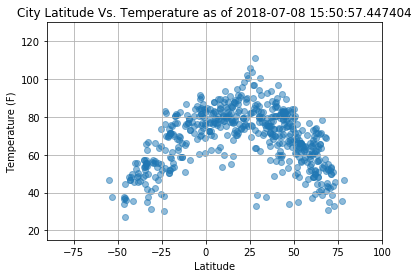

In [22]:
plt.scatter(response_df['Latitude'],
           response_df["Temperature (F)"], marker = 'o', alpha = 0.5, label='City')

plt.title (f"City Latitude Vs. Temperature as of " + str(pd.to_datetime('today')))
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.xlim([-90, 100])
plt.ylim(15, 130)
plt.grid(True)

plt.savefig("Latitude_Temperature.png")

# Latitude vs. Humidity (%)

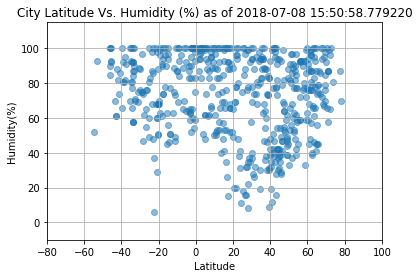

In [23]:
plt.scatter(response_df['Latitude'],
           response_df['Humidity (%)'], marker='o', alpha = .5, label = 'City')

plt.title (f"City Latitude Vs. Humidity (%) as of " + str(pd.to_datetime('today')))
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')
plt.xlim([-80, 100])
plt.ylim([-10, 115])
plt.grid(True)

plt.savefig("Latitude_Humidity.png")

# Latitude vs. Cloudiness

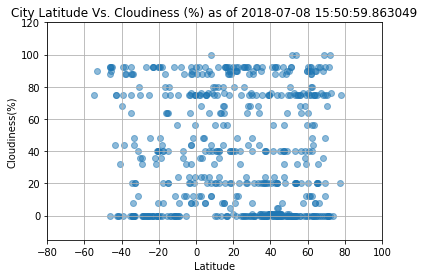

In [24]:
plt.scatter(response_df['Latitude'],
           response_df['Cloudiness (%)'], marker='o', alpha = .5, label = 'City')

plt.title (f"City Latitude Vs. Cloudiness (%) as of " + str(pd.to_datetime('today')))
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.xlim([-80, 100])
plt.ylim([-15, 120])
plt.grid(True)

plt.savefig("Latitude_Cloudiness.png")

# Latitude vs. Wind Speed (MPH)

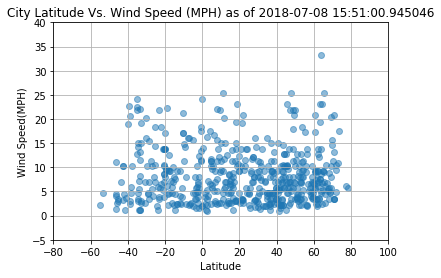

In [25]:
plt.scatter(response_df['Latitude'],
           response_df['Wind Speed (MPH)'], marker='o', alpha = .5, label = 'City')

plt.title (f"City Latitude Vs. Wind Speed (MPH) as of " + str(pd.to_datetime('today')))
plt.ylabel('Wind Speed(MPH)')
plt.xlabel('Latitude')
plt.xlim([-80, 100])
plt.ylim([-5, 40])
plt.grid(True)

plt.savefig("Latitude_WindSpeed.png")